In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_feather('~/Documents/GitHub/AutomatedEssayGrader/essaygrader/data/essays.feather')
df.columns

# essay_id: A unique identifier for each individual student essay
# essay_set: 1-8, an id for each set of essays
# essay: The ascii text of a student's response
# rater1_domain1: Rater 1's domain 1 score; all essays have this
# rater2_domain1: Rater 2's domain 1 score; all essays have this
# rater3_domain1: Rater 3's domain 1 score; only some essays in set 8 have this.
# domain1_score: Resolved score between the raters; all essays have this
# rater1_domain2: Rater 1's domain 2 score; only essays in set 2 have this
# rater2_domain2: Rater 2's domain 2 score; only essays in set 2 have this
# domain2_score: Resolved score between the raters; only essays in set 2 have this
# rater1_trait1 score - rater3_trait6 score: trait scores for sets 7-8

Looking at distributions of essay scores based on essay sets

In [12]:
# Looking at number of essays from each set (8 essay sets)
df['essay_set'].value_counts()

5    1805
6    1800
2    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

In [6]:
# Separating essay sets
essay_set_1 = df.loc[df['essay_set'] == 1]
essay_set_2 = df.loc[df['essay_set'] == 2]
essay_set_3 = df.loc[df['essay_set'] == 3]
essay_set_4 = df.loc[df['essay_set'] == 4]
essay_set_5 = df.loc[df['essay_set'] == 5]
essay_set_6 = df.loc[df['essay_set'] == 6]
essay_set_7 = df.loc[df['essay_set'] == 7]
essay_set_8 = df.loc[df['essay_set'] == 8]

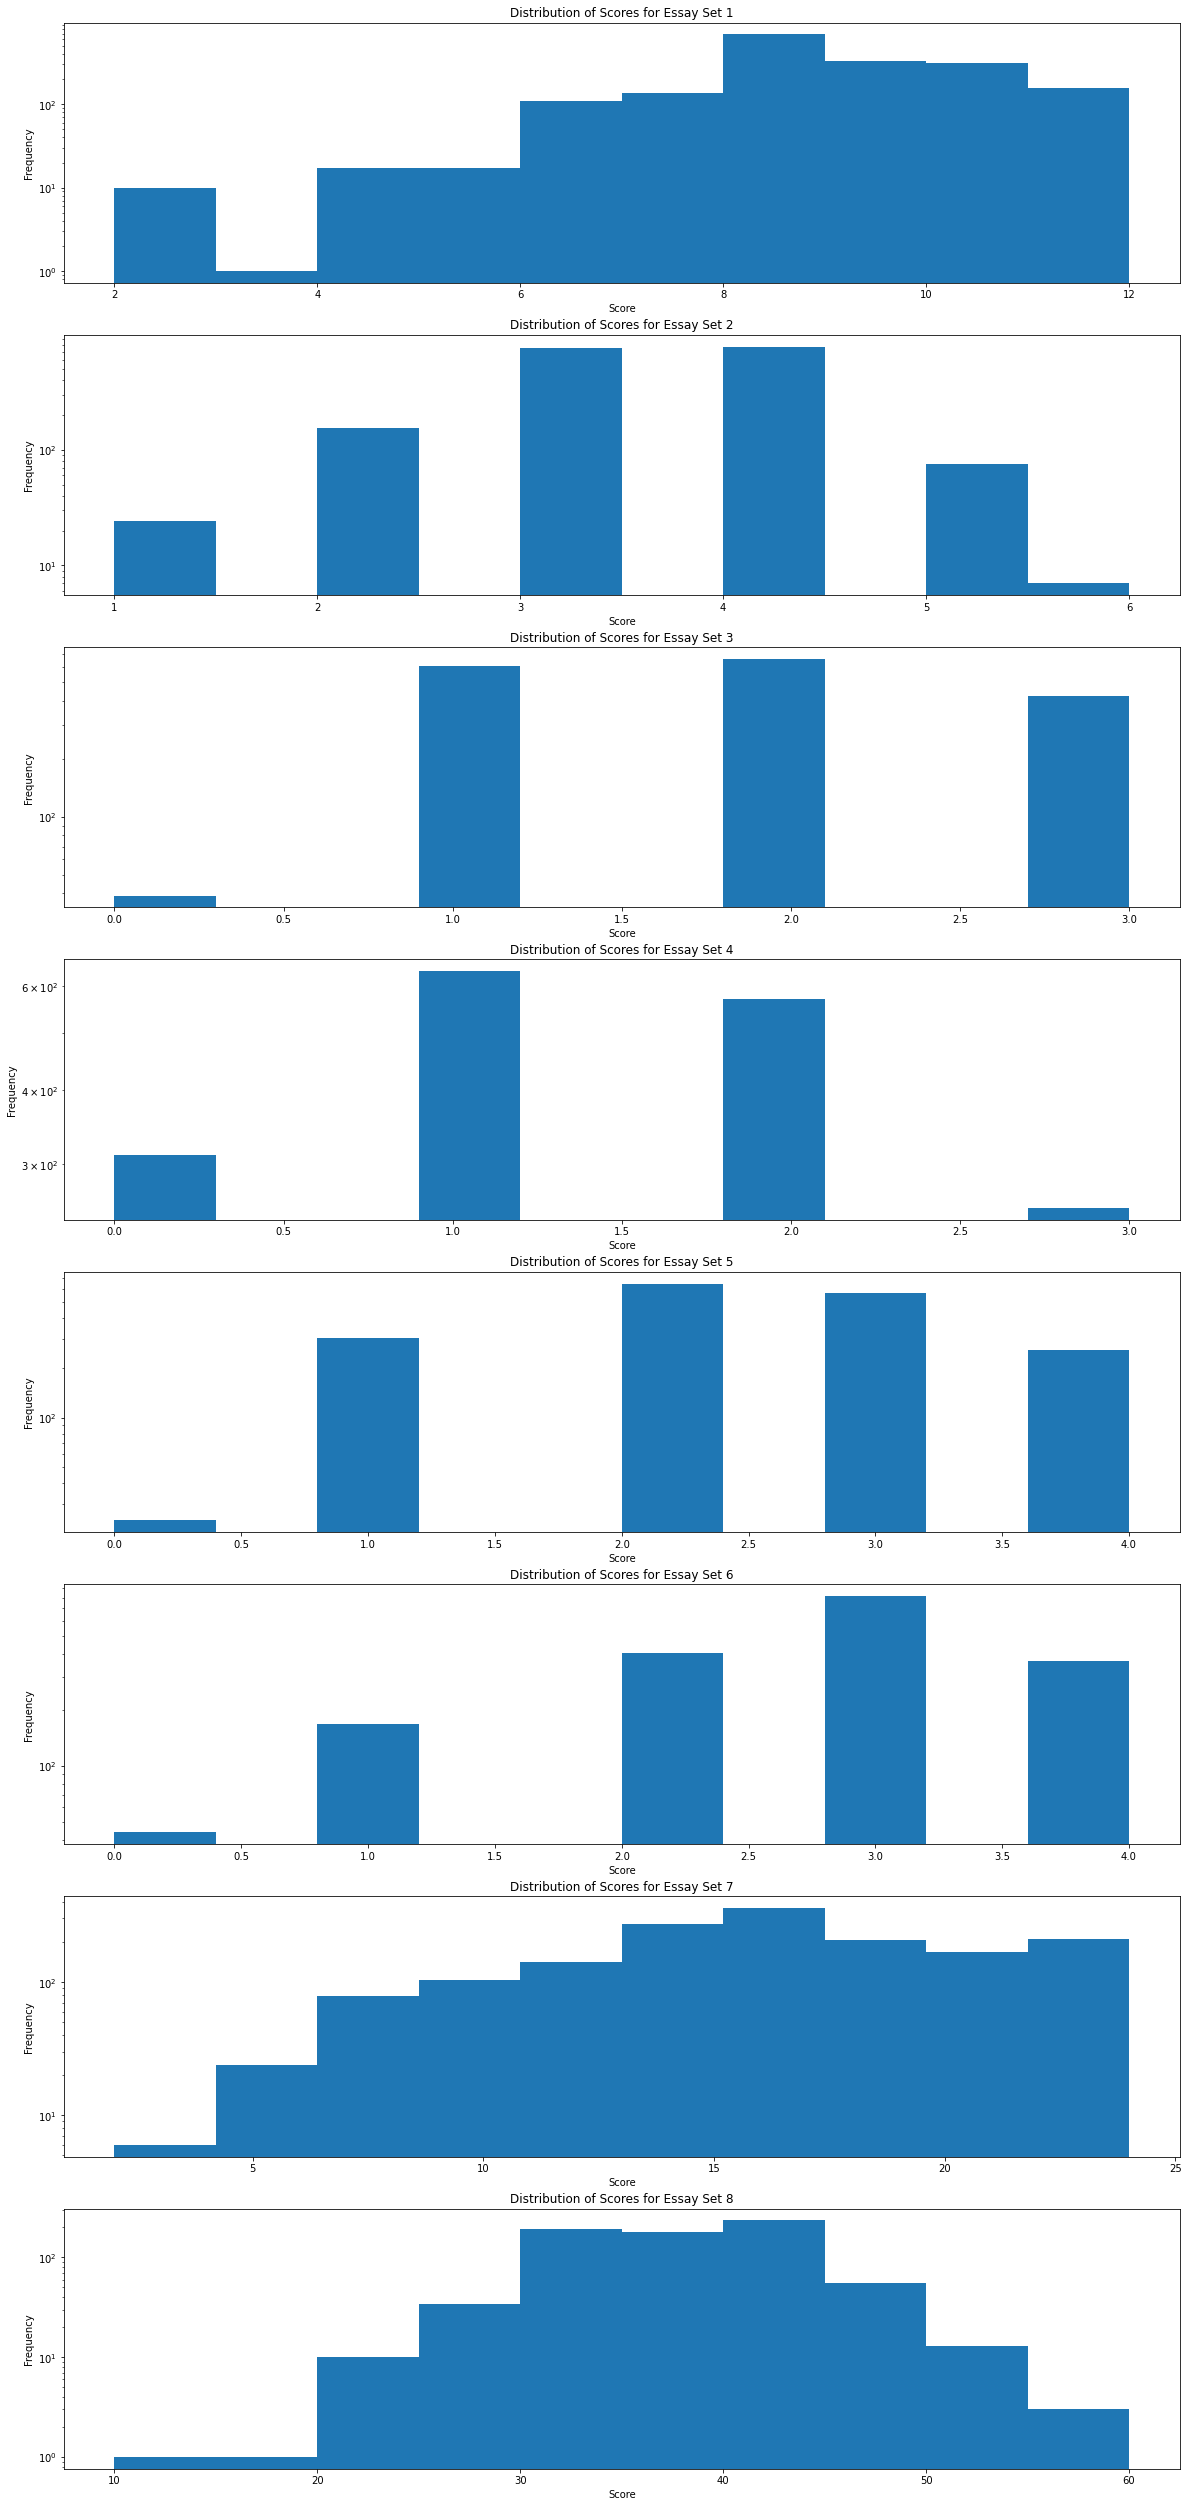

In [23]:
scores1 = essay_set_1['domain1_score'].values
scores2 = essay_set_2['domain1_score'].values
scores3 = essay_set_3['domain1_score'].values
scores4 = essay_set_4['domain1_score'].values
scores5 = essay_set_5['domain1_score'].values
scores6 = essay_set_6['domain1_score'].values
scores7 = essay_set_7['domain1_score'].values
scores8 = essay_set_8['domain1_score'].values

# create a histogram of scores
fig, ax = plt.subplots(8, figsize=(20, 45))
ax[0].hist(scores1)
ax[1].hist(scores2)
ax[2].hist(scores3)
ax[3].hist(scores4)
ax[4].hist(scores5)
ax[5].hist(scores6)
ax[6].hist(scores7)
ax[7].hist(scores8)

# title the graph
for i in range(8):
  ax[i].set_title('Distribution of Scores for Essay Set ' + str(i+1))

# label the x and y axes
for i in range(8):
  ax[i].set_xlabel('Score')
  ax[i].set_ylabel('Frequency')
  # logarithmic scale on the y axis
  ax[i].set_yscale('log')
fig.savefig('images/scoreDistribution.svg')


In [15]:
scores = [scores1, scores2, scores3, scores4, scores5, scores6, scores7, scores8]
for i in range(len(scores)):
  print("Largest score of Essay Set " + str(i+1) + ": " + str(max(scores[i])))
  print("Smallest score of Essay Set " + str(i+1) + ": " + str(min(scores[i])))
  print('\n')

Largest score of Essay Set 1: 12
Smallest score of Essay Set 1: 2


Largest score of Essay Set 2: 6
Smallest score of Essay Set 2: 1


Largest score of Essay Set 3: 3
Smallest score of Essay Set 3: 0


Largest score of Essay Set 4: 3
Smallest score of Essay Set 4: 0


Largest score of Essay Set 5: 4
Smallest score of Essay Set 5: 0


Largest score of Essay Set 6: 4
Smallest score of Essay Set 6: 0


Largest score of Essay Set 7: 24
Smallest score of Essay Set 7: 2


Largest score of Essay Set 8: 60
Smallest score of Essay Set 8: 10




In [2]:
df = pd.read_feather('~/Documents/GitHub/AutomatedEssayGrader/essaygrader/data/essaysPrelim.feather')
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'cleaned_essay',
       'cleaned_essay_no_sw', 'cleaned_essay2', 'cleaned_essay2_no_sw',
       'Average Word Length', 'word_count', 'average_sentence_length',
       'sentcount'],
      dtype='object')

<AxesSubplot:>

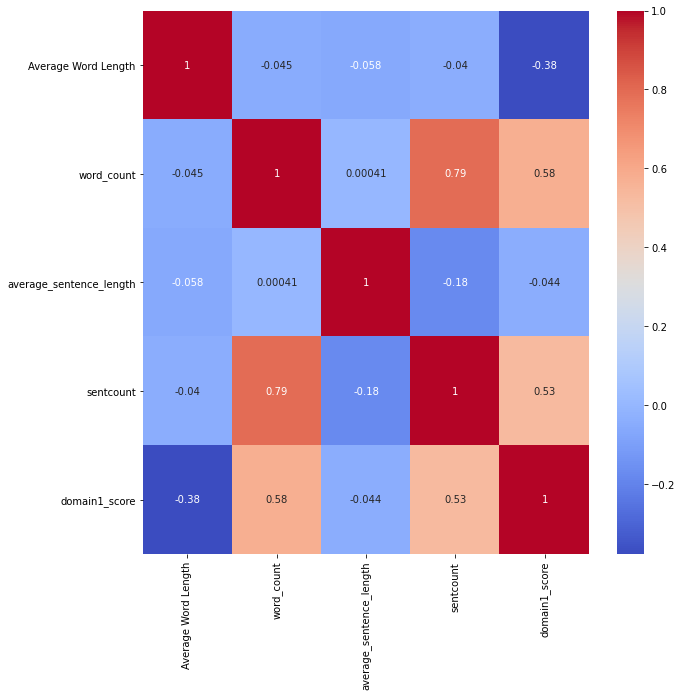

In [5]:
prelim = df[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

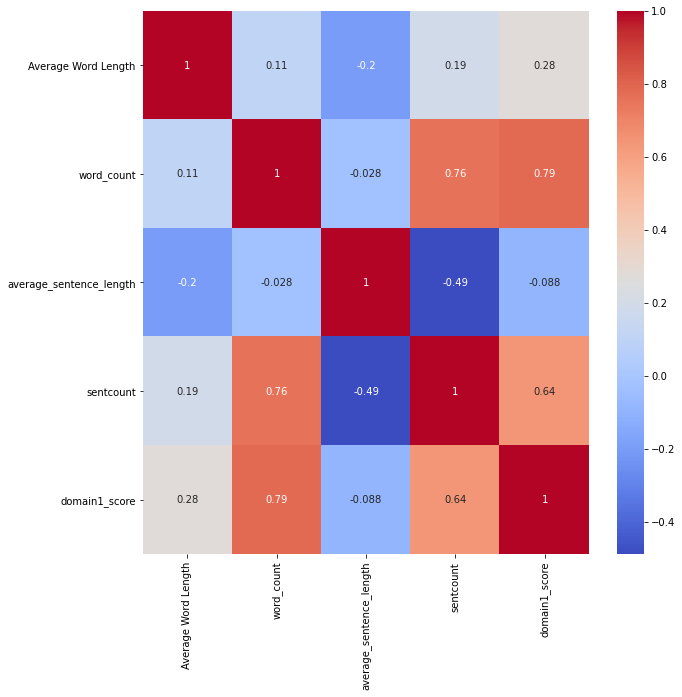

In [7]:
prelim1 = essay_set_1[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

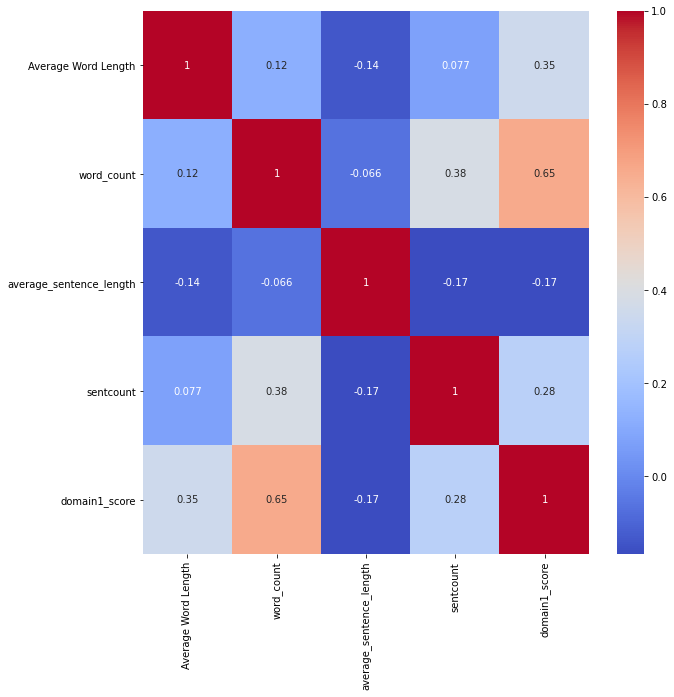

In [8]:
prelim2 = essay_set_2[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

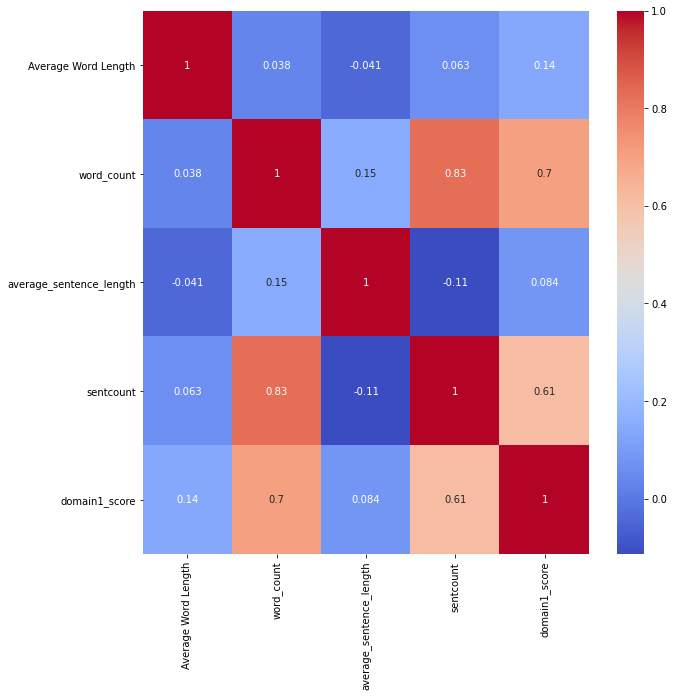

In [9]:
prelim3 = essay_set_3[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

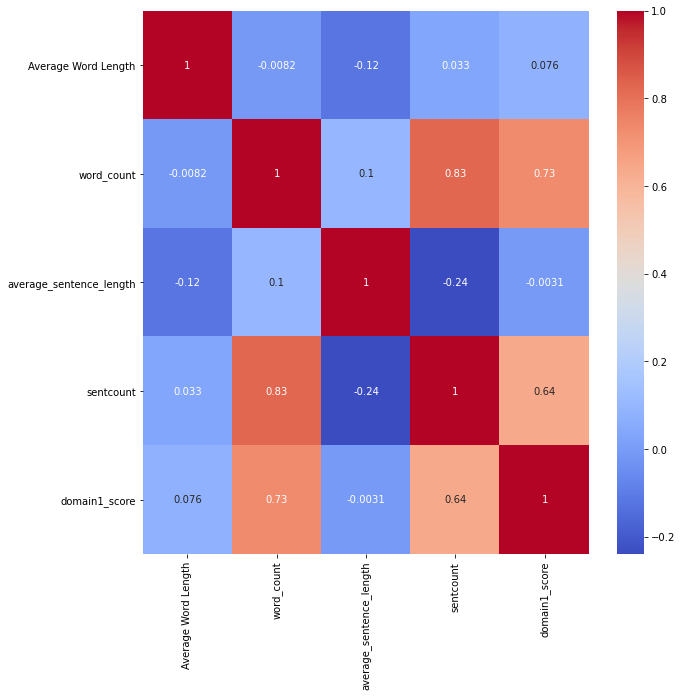

In [10]:
prelim4 = essay_set_4[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim4.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

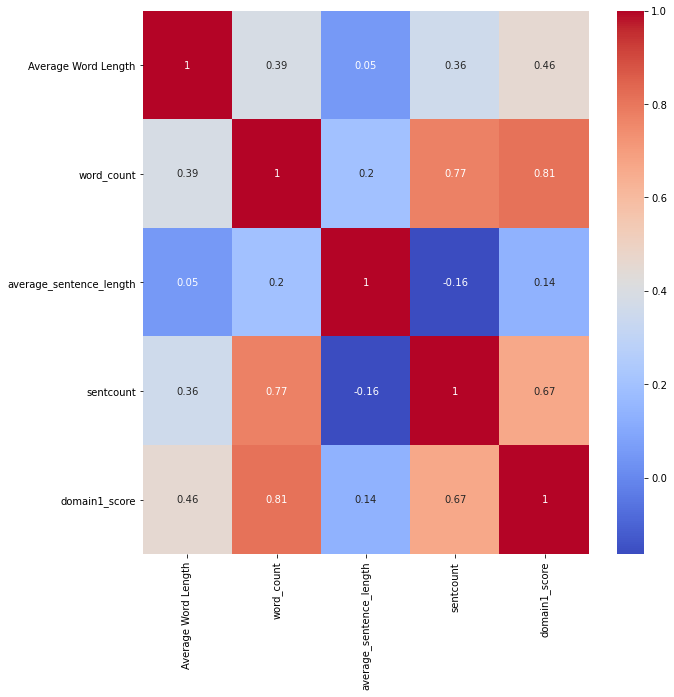

In [11]:
prelim5 = essay_set_5[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim5.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

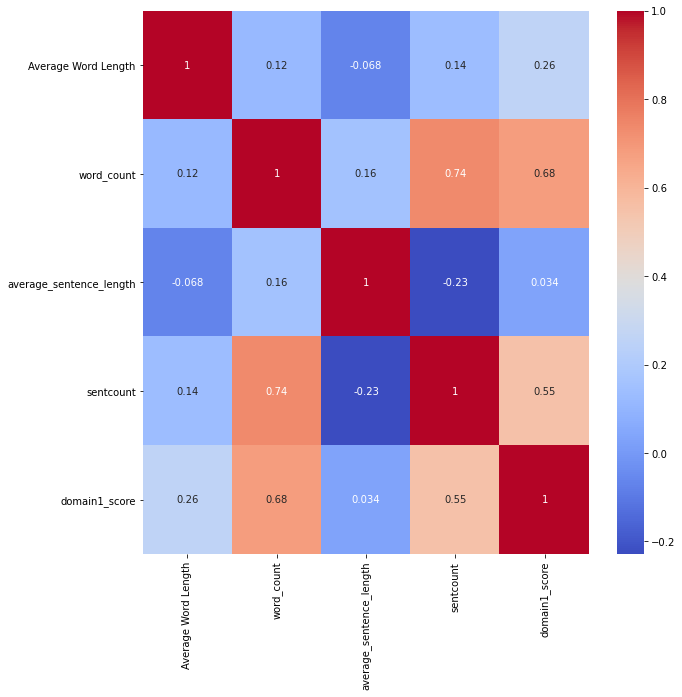

In [12]:
prelim6 = essay_set_6[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim6.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

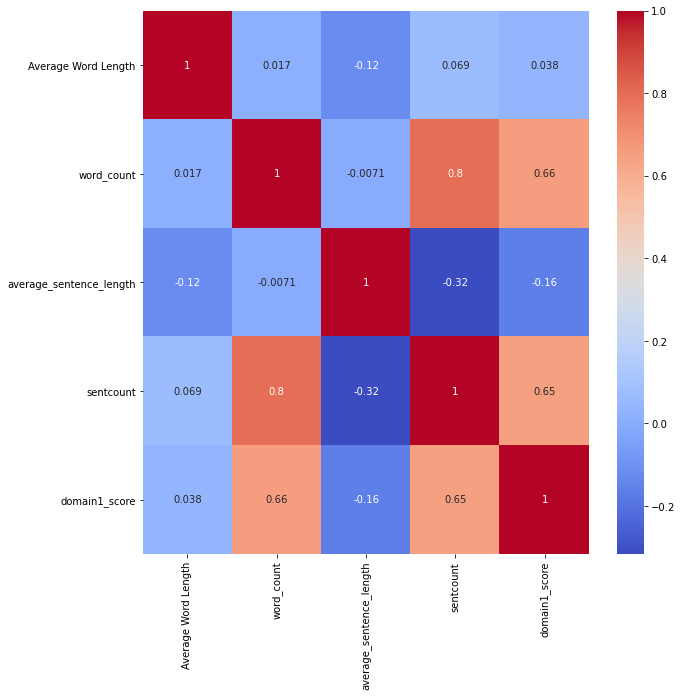

In [13]:
prelim7 = essay_set_7[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim7.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

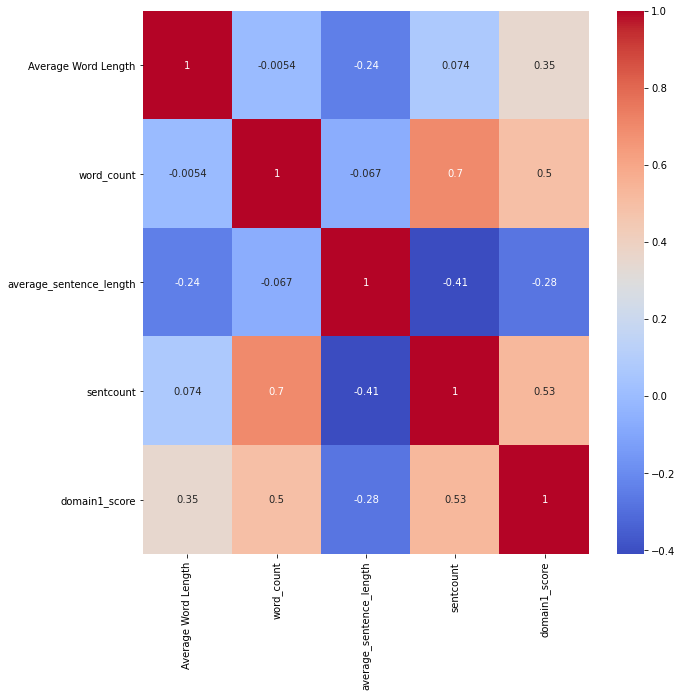

In [14]:
prelim8 = essay_set_8[['Average Word Length', 'word_count', 'average_sentence_length', 'sentcount', 'domain1_score']]
corr = prelim8.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)